In [1]:
import os
os.getcwd() 
os.chdir(os.pardir)
os.getcwd()



'/Users/carlahugod/Desktop/UNI/6sem/bach/energy-based-representation-learning'

In [9]:
import torch
from src.comet_models import LatentEBM, LatentEBM128
from src.dataloader import MRI2D
import logging
from torch.utils.data import DataLoader
from src.test_final import gen_image as gen_image_our
import neptune

# LatentEBM128

In [45]:
checkpoint_ebm128 = '/Users/carlahugod/Desktop/UNI/6sem/bach/energy-based-representation-learning/src/models/latentEBM128_UN_767.pth'

config_path = '/Users/carlahugod/Desktop/UNI/6sem/bach/energy-based-representation-learning/src/config/2DMRI_config.yml'
dataset_type = 'MRI2D'


run_name = checkpoint_ebm128.split("/")[-1].split(".")[0]
print(f"Run name: {run_name}")
# Load configuration

run = neptune.init_run(project=os.getenv("NEPTUNE_PROJECT_NAME"), 
                   api_token = os.getenv("NEPTUNE_API_TOKEN"),
                   with_id = 'UN-767',)


config = run.fetch()['config']
print(config)


dataset = MRI2D(config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

checkpoint = torch.load(checkpoint_ebm128, map_location=device)

state_dicts = checkpoint if isinstance(checkpoint, list) else [checkpoint]

from types import SimpleNamespace

def dict_to_namespace(d):
    return SimpleNamespace(**d)

config_ns = dict_to_namespace(config)
models = [LatentEBM128(config_ns, dataset_type).to(device) for i in range(len(state_dicts))]


for i, model in enumerate(models):
    model.load_state_dict(state_dicts[i], strict=False)
    model.eval()  # Set to evaluation mode

# Prepare data
dataloader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=config['data_workers'])
im, _ = next(iter(dataloader))
im = im.to(device)

# Embed latent
latent = models[0].embed_latent(im)
latents = torch.chunk(latent, config['components'], dim=1)
# each latent is a component, and has size (batch_size, latent_dim)


Run name: latentEBM128_UN_767
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/unsupervised-learning-of-energy-representations/unsupervised-learning-of-energy-representations/e/UN-767
{'batch_size': 8, 'channels': 1, 'components': 4, 'data_path': 'data/*.npy', 'data_workers': 0, 'dataset': '2DMRI', 'decoder': False, 'ensembles': 5, 'filter_dim': 32, 'latent_dim': 64, 'lr': 0.0001, 'model': 'LatentEBM128', 'num_epoch': 10, 'pos_embed': False, 'recurrent_model': False, 'run_name': '2DMRI with ebm128', 'shuffle_dataset': True, 'step_lr': 500.0, 'steps': 100000, 'test_run': False, 'train_data_size': 0.75}


In [68]:
im_neg = torch.rand_like(im)
im_negs = gen_image_our(latents, config_ns, models, im_neg, 60, 0)

our_final_image = im_negs[-1][0].detach().cpu().numpy().transpose(1, 2, 0)
print(our_final_image.shape)


100%|██████████| 60/60 [02:51<00:00,  2.86s/it]

(228, 198, 1)


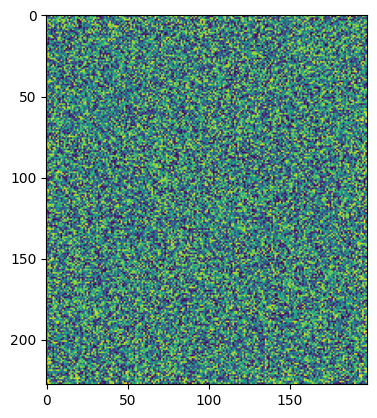

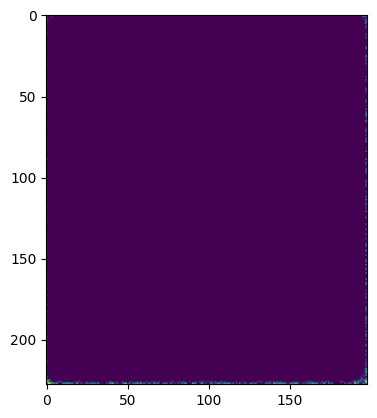

In [73]:
import matplotlib.pyplot as plt


plt.imshow(im_negs[0][0].detach().cpu().numpy().transpose(1,2,0))
plt.show()
plt.imshow(im_negs[-1][0].detach().cpu().numpy().transpose(1,2,0))
plt.show()

# LatentEBM

In [71]:
checkpoint_ebm = '/Users/carlahugod/Desktop/UNI/6sem/bach/energy-based-representation-learning/src/models/latentEBM_old_UN768.pth'
dataset_type = 'MRI2D'


run_name = checkpoint_ebm.split("/")[-1].split(".")[0]
print(f"Run name: {run_name}")
# Load configuration

run = neptune.init_run(project=os.getenv("NEPTUNE_PROJECT_NAME"), 
                   api_token = os.getenv("NEPTUNE_API_TOKEN"),
                   with_id = 'UN-768',)


config = run.fetch()['config']
print(config)


dataset = MRI2D(config)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

checkpoint = torch.load(checkpoint_ebm, map_location=device)

state_dicts = checkpoint if isinstance(checkpoint, list) else [checkpoint]

from types import SimpleNamespace

def dict_to_namespace(d):
    return SimpleNamespace(**d)

config_ns = dict_to_namespace(config)
models = [LatentEBM(config_ns, dataset_type).to(device) for i in range(len(state_dicts))]


for i, model in enumerate(models):
    model.load_state_dict(state_dicts[i], strict=False)
    model.eval()  # Set to evaluation mode

# Prepare data
dataloader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=config['data_workers'])
im, _ = next(iter(dataloader))
im = im.to(device)

# Embed latent
latent = models[0].embed_latent(im)
latents = torch.chunk(latent, config['components'], dim=1)
# each latent is a component, and has size (batch_size, latent_dim)


Run name: latentEBM_old_UN768
[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/unsupervised-learning-of-energy-representations/unsupervised-learning-of-energy-representations/e/UN-768
{'batch_size': 8, 'channels': 1, 'components': 4, 'data_path': 'data/*.npy', 'data_workers': 0, 'dataset': '2DMRI', 'decoder': False, 'ensembles': 5, 'filter_dim': 32, 'latent_dim': 64, 'lr': 0.0001, 'model': 'LatentEBM', 'num_epoch': 10, 'pos_embed': False, 'recurrent_model': False, 'run_name': '2DMRI', 'shuffle_dataset': True, 'step_lr': 500.0, 'steps': 100000, 'test_run': False, 'train_data_size': 0.75}


In [72]:
im_neg = torch.rand_like(im)
im_negs = gen_image_our(latents, config_ns, models, im_neg, 60, 0)

our_final_image = im_negs[-1][0].detach().cpu().numpy().transpose(1, 2, 0)
print(our_final_image.shape)


100%|██████████| 60/60 [02:40<00:00,  2.67s/it]

(228, 198, 1)


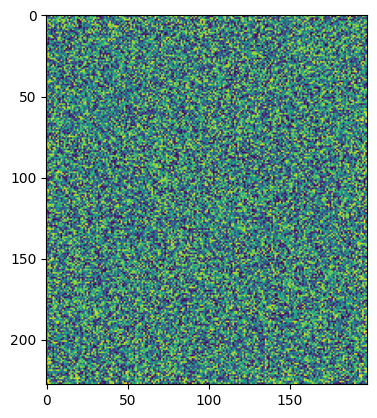

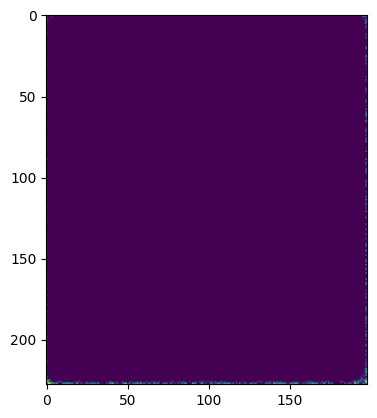

In [74]:
import matplotlib.pyplot as plt

plt.imshow(im_negs[0][0].detach().cpu().numpy().transpose(1,2,0))
plt.show()
plt.imshow(im_negs[-1][0].detach().cpu().numpy().transpose(1,2,0))
plt.show()